<a href="https://colab.research.google.com/github/RayBasilio123/ic2020/blob/main/TutorialPrevis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando dados

In [2]:
!git clone https://github.com/PatriciaLucas/Evapotranspiracao


fatal: destination path 'Evapotranspiracao' already exists and is not an empty directory.


In [3]:
pip install pmdarima

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
import seaborn as sns 
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= 15,6
 
%matplotlib inline 


In [5]:
import pandas as pd
data = pd.read_csv('/content/Evapotranspiracao/ETo_setelagoas.csv')
data.head()




,Data,Eto
0,1993-01-01,5.515947
1,1993-01-02,5.587673
2,1993-01-03,5.319605
3,1993-01-04,4.245526
4,1993-01-05,3.004685


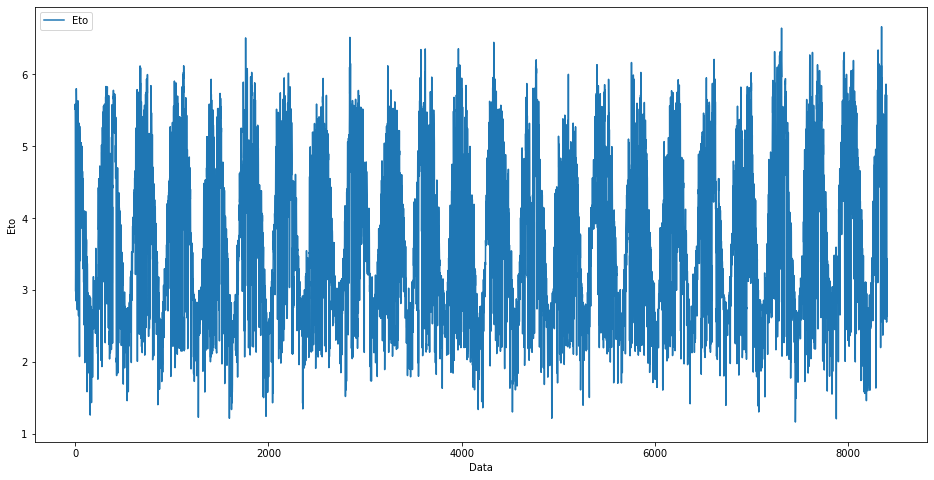

In [6]:
data.plot(figsize=(16,8))
plt.xlabel("Data")
plt.ylabel("Eto")
plt.show()


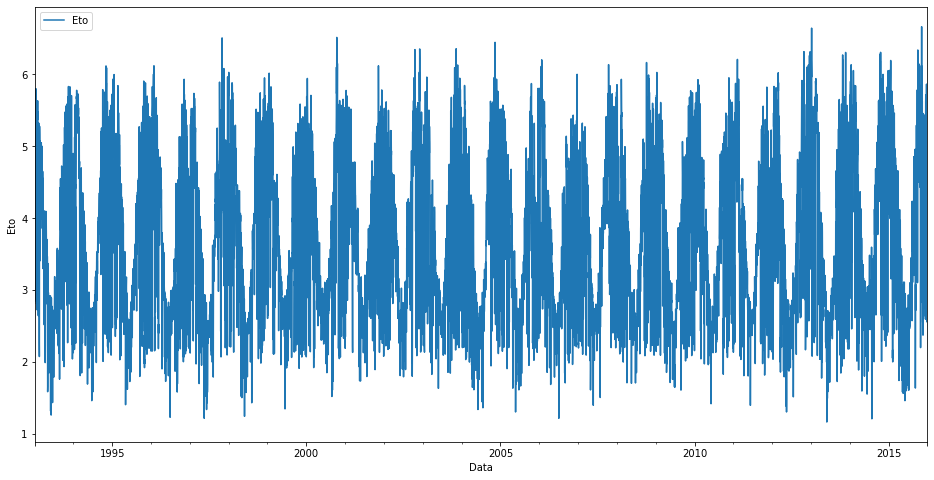

In [7]:
#Transformando em serie temporal

data = pd.read_csv('/content/Evapotranspiracao/ETo_setelagoas.csv', usecols=['Data','Eto'])
#data['Data'] = pd.to_datetime(data['Data'])
#data['year'] = data['Data'].dt.year
#data['month'] = data['Data'].dt.month
#data['day'] = data['Data'].dt.day
data = data.set_index('Data')
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.plot(figsize=(16,8))
plt.xlabel("Data")
plt.ylabel("Eto")
plt.show()

In [8]:
data.head()

,Eto
Data,
1993-01-01,5.515947
1993-01-02,5.587673
1993-01-03,5.319605
1993-01-04,4.245526
1993-01-05,3.004685


# 1-Escolha um modelo

Existe uma grande variedade de modelos e algoritmos de previsão disponíveis. Alguns deles incluem:



- Método médio : 
  As previsões para todos os valores futuros são iguais à média dos dados históricos. [ruim]
- Método ingênuo :
 As previsões são iguais ao valor da última observação. [ruim]
-Método ingênuo sazonal: 
  As previsões são iguais ao último valor observado da mesma estação do ano. [ruim]
- Método de desvio: 
  Uma variação do método ingênuo é permitir que as previsões aumentem ou diminuam ao longo do tempo, em que a quantidade de alterações ao longo do tempo (chamada de desvio) é definida como a alteração média observada nos dados históricos. [ruim]
- Suavização exponencial simples, dupla e tripla.
[apenas o TES é decente]
- ARIMA e amigos (ARMA, ARIMA, SARIMA, SARIMAX, VAR, VARMA. 
[decente]
- Profeta do Facebook : 
Uma biblioteca de código aberto publicada pelo Facebook que se baseia em modelos decomponíveis (tendência + sazonalidade + feriados). [decente]
- Algoritmos de aprendizado de máquina : 
Tem-se aumento de gradiente aos LSTMs. 
[Boa?]
- Média do acima exposto : 
Calcula a média das previsões por um algoritmo ML e, digamos, Suavização exponencial simples. [Boa]

## O que é suavização exponencial?
> (https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/)
> (https://uncoolai.com/exponential-smoothing-for-time-series-forecasting/)

> Livro 1 - Previsão prática de séries temporais com R , 2016.

> Livro 2 - Forecasting: principles and practice, 2013.

- A suavização exponencial é um método de previsão de séries temporais para dados univariados.


- As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações anteriores, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.


### Tipos de suavização exponencial

Existem três tipos principais de métodos de previsão de séries temporais de suavização exponencial.

Um método simples que não assume estrutura sistemática, uma extensão que lida explicitamente com as tendências e a abordagem mais avançada que adiciona suporte à sazonalidade.

### Suavização exponencial única

Suavização exponencial única, o SES, também chamado de Suavização exponencial simples, é um método de previsão de séries temporais para dados univariados sem tendência ou sazonalidade.

Requer um único parâmetro, chamado alfa ( a ), também chamado de fator de suavização ou coeficiente de suavização.Este parâmetro controla a taxa na qual a influência das observações em etapas anteriores decai exponencialmente. Alfa geralmente é definido como um valor entre 0 e 1. Valores grandes significam que o modelo presta atenção principalmente às observações passadas mais recentes, enquanto valores menores significam que mais da história é levada em consideração ao fazer uma previsão.

 Um valor próximo a 1 indica aprendizado rápido (ou seja, apenas os valores mais recentes influenciam as previsões), enquanto um valor próximo a 0 indica aprendizado lento (observações anteriores têm uma grande influência nas previsões).



Hiperparâmetros:

 *  Alfa : fator de suavização para o nível.

### Suavização exponencial dupla

A suavização exponencial dupla é uma extensão da suavização exponencial que adiciona explicitamente suporte para tendências na série temporal univariada.

Além do parâmetro alfa para controlar o fator de suavização do nível, um fator de suavização adicional é adicionado para controlar a deterioração da influência da mudança na tendência chamada beta ( b ).

O método suporta tendências que mudam de maneiras diferentes: um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.

A suavização exponencial dupla com uma tendência aditiva é classicamente chamada de modelo de tendência linear de Holt, nomeado para o desenvolvedor do método Charles Holt.

Tendência aditiva : Suavização exponencial dupla com uma tendência linear.

Tendência multiplicativa : Suavização exponencial dupla com uma tendência exponencial.

Para previsões de longo alcance (várias etapas), a tendência pode continuar irrealisticamente. Como tal, pode ser útil diminuir a tendência ao longo do tempo.

Umedecer significa reduzir o tamanho da tendência no futuro, reduzindo-o para uma linha reta (sem tendência).

As previsões geradas pelo método linear de Holt mostram uma tendência constante (aumentando ou diminuindo) indecentemente no futuro. Ainda mais extremas são as previsões geradas pelo método de tendência exponencial […] Motivadas por essa observação […] introduziu um parâmetro que “amortece” a tendência para uma linha plana em algum momento no futuro.



Assim como na modelagem da própria tendência, podemos usar os mesmos princípios para amortecer a tendência, especificamente de forma aditiva ou multiplicativa para um efeito de amortecimento linear ou exponencial. Um coeficiente de amortecimento Phi ( p ) é usado para controlar a taxa de amortecimento.

Amortecimento aditivo : umedeça uma tendência linearmente.

Amortecimento multiplicativo : umedeça exponencialmente a tendência.

Hiperparâmetros:

- Alfa : fator de suavização para o nível.
- Beta : fator de suavização para a tendência.

- Tipo de tendência : aditivo ou multiplicativo.

- Tipo de Amortecimento : Aditivo ou multiplicativo.

- Phi : Coeficiente de amortecimento.

###Suavização exponencial tripla

A suavização exponencial tripla é uma extensão da suavização exponencial que adiciona explicitamente suporte à sazonalidade à série temporal univariada.

Às vezes, esse método é chamado de suavização exponencial de Holt-Winters, com o nome de dois colaboradores: Charles Holt e Peter Winters.

Além dos fatores de suavização alfa e beta, é adicionado um novo parâmetro chamado gama ( g ) que controla a influência no componente sazonal.

Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou multiplicativo para uma mudança linear ou exponencial na sazonalidade.

Sazonalidade aditiva : Suavização exponencial tripla com uma sazonalidade linear.

Sazonalidade multiplicativa : Suavização exponencial tripla com uma sazonalidade exponencial.

A suavização exponencial tripla é a variação mais avançada da suavização exponencial e, através da configuração, também pode desenvolver modelos de suavização exponencial dupla e única.

Por ser um método adaptativo, a suavização exponencial da Holt-Winter permite que os padrões de nível, tendência e sazonalidade mudem com o tempo.


Além disso, para garantir que a sazonalidade seja modelada corretamente, o número de etapas de tempo em um período sazonal ( período ) deve ser especificado. Por exemplo, se a série fosse de dados mensais e o período sazonal repetido a cada ano, o Período = 12.

Hiperparâmetros:

- Alfa : fator de suavização para o nível.
- Beta : fator de suavização para a tendência.
- Gama : fator de suavização para a sazonalidade.
- Tipo de tendência : aditivo ou multiplicativo.
- Tipo de Amortecimento : Aditivo ou multiplicativo.
- Phi : Coeficiente de amortecimento.
- Sazonalidade Tipo : Aditivo ou multiplicativo.
- Período : etapas do tempo no período sazonal.

## O que é ARIMA ?

ARIMA, abreviação de 'Média Móvel Integrada Regressiva Automática' é na verdade uma classe de modelos que 'explica' uma determinada série temporal com base em seus próprios valores passados, ou seja, seus próprios atrasos e erros de previsão atrasados, para que a equação possa ser usada para prever valores futuros.

Qualquer série temporal 'não sazonal' que exibe padrões e não apresenta ruído branco aleatório pode ser modelada com os modelos ARIMA.

Um modelo ARIMA é caracterizado por 3 termos: p, d, q

Onde,

p é a ordem do termo AR

q é a ordem do termo MA

d é o número de diferenciações necessárias para tornar estacionária a série temporal

Se uma série temporal tiver padrões sazonais, será necessário adicionar termos sazonais e ele se tornará SARIMA, abreviação de 'ARIMA sazonal'. Mais sobre isso quando terminarmos o ARIMA.

Então, o que o termo "ordem do termo AR" significa? Antes de irmos para lá, vamos primeiro olhar para o termo 'd'.

###O que são modelos AR e MA
Então, o que são modelos AR e MA? qual é a fórmula matemática real para os modelos AR e MA?

- 'p' é a ordem do termo 'Regressivo Automático' (AR). Refere-se ao número de defasagens de Y a serem usadas como preditores.

- 'q' é a ordem do termo 'Média Móvel' (MA). Refere-se ao número de erros de previsão atrasada que devem ser inseridos no modelo ARIMA.

- 'd'é o número mínimo de diferenciação necessário para tornar a série estacionária. E se a série temporal já estiver estacionária, d = 0.

Modelo ARIMA em palavras:


Yt previsto = combinação constante + linear Lags de Y (até p atrasos) + combinação linear de erros de previsão atrasados ​​(até q atrasos)



# 2-Divida os dados em treinamento e teste

- Não existe um valor padrão, mas cerca de 20% do total de dados para o teste é um bom valor.

- O conjunto de teste deve idealmente ser pelo menos tão grande quanto o horizonte máximo de previsão necessário.

- Quanto maior o horizonte, menos precisa a previsão.

In [9]:
from matplotlib import pyplot
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:len(data)]
print('Observations: %d' % (len(data)))
print('Training Observations: %d' % (len(train_data)))
print('Testing Observations: %d' % (len(test_data)))




Observations: 8400
Training Observations: 6720
Testing Observations: 1680


In [10]:
#outro jeito de fazer a mesma coisa 
#train_data = data.iloc[:6720]
#test_data = data.iloc[6720:]
#como são 8400 dados, 20% corresponde aproximadamente 1680 dados que serão deixados para teste e 80%  será deixado 
#para o treino corresponte a aproximadamente 6720 dados 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys


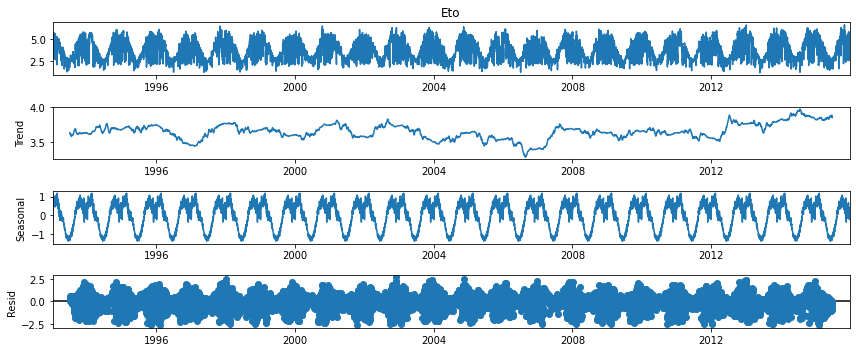

In [11]:
#Decompondo a serie para observar a sazonalidade e estacionalidade
from statsmodels.tsa.seasonal import seasonal_decompose
###Em principio series com tendendia e sazonalidade não são etacionarias
###series estacionarias mantem a media e a variancia constante por um tempo
#Esta serie tem forte indicação de ser estacionaria 

decomposition =seasonal_decompose(data['Eto'],freq=365);
plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();

In [12]:
#teste de Dickey-Fuller estatistico pra ver se a serie é estacionaria
#https://machinelearningmastery.com/time-series-data-stationary-python/

from statsmodels.tsa.stattools import adfuller
#X=data["Eto"]
#result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
#	print('\t%s: %.3f' % (key, value))
 

X = adfuller(data["Eto"])
dataoutput = pd.Series(X[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in X[4].items():
    dataoutput['Critical Value (%s)'%key] = value
print(dataoutput)

# A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária,
# que não é estacionária (possui alguma estrutura dependente do tempo). 

# Hipótese nula (H0) : Se não for rejeitada, sugere que a série temporal tenha uma raiz unitária, 
# o que significa que não é estacionária. Tem alguma estrutura dependente do tempo.
# Hipótese alternativa (H1) : a hipótese nula é rejeitada; sugere que a série temporal não 
# tem uma raiz unitária, o que significa que é estacionária. Não possui estrutura dependente do tempo.

# Valor p> 0,05 : falha ao rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e não são estacionários.
# Valor de p <= 0,05 : Rejeita a hipótese nula (H0), os dados não possuem uma raiz unitária e são estacionários.

Test Statistic                -9.475015e+00
p-value                        4.011225e-16
#Lags Used                     2.100000e+01
Number of Observations Used    8.378000e+03
Critical Value (1%)           -3.431131e+00
Critical Value (5%)           -2.861885e+00
Critical Value (10%)          -2.566954e+00
dtype: float64


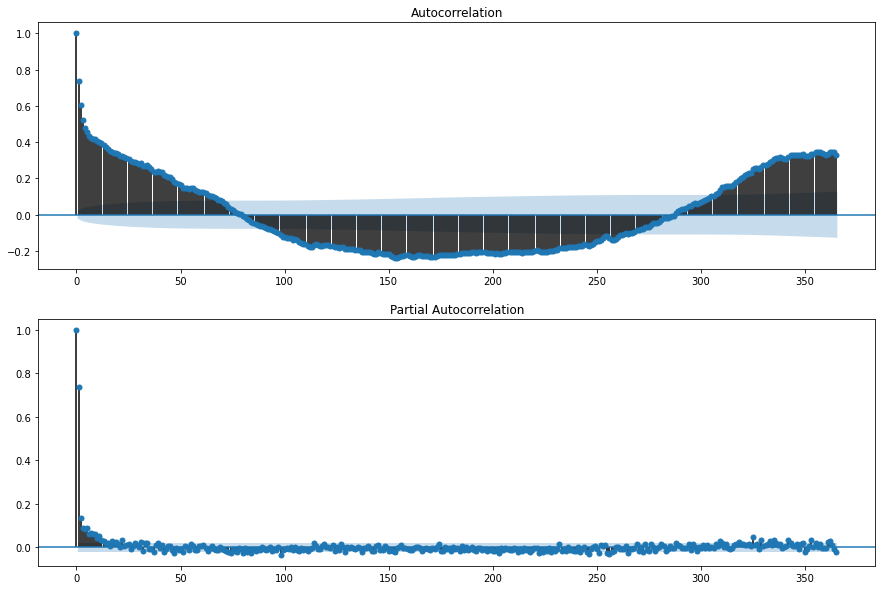

In [13]:
#teste estatistico pra ver se a serie é estacionaria
#!pip3 uninstall statsmodels
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
#plot_acf(data, ax=ax1,lags=50,)
#plot_pacf(data, lags=50, ax=ax2)
#plt.show()

import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=365, ax=ax1)
sm.graphics.tsa.plot_pacf(data.values.squeeze(), lags=365, ax=ax2)
plt.show()




# 3-Coloque o modelo no conjunto de treinamento

##ARIMA

In [ ]:
import pmdarima as pm
# modelARIMA = pm.auto_arima(data["Eto"], d=7, D=7, m=7, trend='c', seasonal=True,start_p=0, start_q=0, max_order=6, test='adf',stepwise=True, trace=True)
modelARIMA=pm.auto_arima(data['Eto'], start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=5.18 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=26109.163, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=23156.917, Time=2.02 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=7.89 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=25644.851, Time=0.39 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=22219.790, Time=4.39 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=23.87 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=9.43 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=22758.215, Time=2.20 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=21972.145, Time=5.37 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=22924.965, Time=2.55 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=25.77 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=12.75 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=21797.097, Time=7.19 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=22759.651,

In [ ]:
#O AIC (Critério de Informação de Akaike) é um estimador de erro de previsão fora da amostra e 
#da qualidade relativa do nosso modelo. 
#O resultado desejado é: encontrar a menor pontuação possível da AIC.

print(f"Resultado AIC: {modelARIMA.aic()}")
print(f"Resultado melhores parametros (p,d,q): {modelARIMA.order}")



In [ ]:
#Siginificados ARIMA:
#1 -> AR - Autorregressivo:Avalia a relação entre os periodos(lags) e extrai essa influencia
#2 -> I - Integrate-Aplica diferenciação se necessario caso a serie nao for estacionaria
#3 -> MA - Moving Average-Avalia erros entre os periodos  e extrai estes erros

#1 -> p - Ordem da parte autorregressiva 
#2 -> d - Grau de diferenciação
#3 -> q - Ordem da media movel
#se tiver sazonalidade acresentamos mais (P,D,Q)

#Fit ARIMA (p, d, q)(P, D, Q)
#-----------------------------
#Fit ARIMA(1,1,1)x(1,1,1,12) AIC=18700.931
#Sem considerar sazonalidade em m= 12(2,1,1)x(0,0,0,0)
#(1,7,0)x(1,7,0,7)
#modelARIMA.fit(train_data['Eto'])
#results.summary()

In [ ]:
#Validado modelo Autoarima
#A maior preocupação é garantir que os residuos sejam normalmente distribuidos com media zero

modelARIMA.plot_diagnostics(figsize=(15,10))

plt.show()

## Suavização exponencial simples, dupla e tripla


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing 

In [ ]:
#>>alpha(α) é o fator de suavisação de nivel o<X<1
#Um valor próximo a 1 indica aprendizado rápido,ou seja, apenas os valores mais recentes influenciam 
#as previsões e vice versa.
#>>beta (β) é o fator  de suavização para a tendência.
#O método suporta tendências que mudam de maneiras diferentes: 
#um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.
#>>gama (γ) é o fator de suavização para a sazonalidade.
#Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou
#multiplicativo para uma mudança linear ou exponencial na sazonalidade.

span = 12 # O modelo considerará a média ponderada dos últimos 12 meses para previsão 
alpha = 2/(span+1)
#alpha=0,15

simpleExpSmooth_model = SimpleExpSmoothing(train_data['Eto']).fit(smoothing_level=alpha,optimized=False)

doubleExpSmooth_model = ExponentialSmoothing(train_data['Eto'],trend='add',seasonal_periods=365).fit()

tripleExpSmooth_model = ExponentialSmoothing(train_data['Eto'],trend='add',seasonal='add',seasonal_periods=365).fit()


# 4- Avalie o modelo no conjunto de testes

In [ ]:
predictions_simpleExpSmooth_model = simpleExpSmooth_model.forecast(730)
predictions_doubleExpSmooth_model = doubleExpSmooth_model.forecast(730)
predictions_tripleExpSmooth_model = tripleExpSmooth_model.forecast(730)

In [ ]:
#visualizando previsoes
train_data['Eto'].plot(legend=True,label='TRAIN',figsize=(15,6))
test_data['Eto'].plot(legend=True,label='TEST',figsize=(15,6))

#forecast_Arima= modelARIMA.predict(n_periods= 730)
#forecast_Arima= pd.DataFrame(forecast_Arima,index=test_data.index,columns=['#Eto'])
#pd.concat([test_data,forecast_Arima],axis=1).plot()

predictions_simpleExpSmooth_model.plot(legend=True,label='Simple Exponential Forecast')
predictions_doubleExpSmooth_model.plot(legend=True,label='Double Exponential Forecast')
predictions_tripleExpSmooth_model.plot(legend=True,label='Triple Exponential Forecast')








In [ ]:
#Observações:
#o SimpleExponentialModel não considera a tendência e a sazonalidade.Ele pegará a média ponderada dos dados passados ​​e preverá a média para todos os dados de teste. É por isso que você pode observar uma 
#linha reta como a previsão. Este modelo não é muito útil para nós.


#Metricas de erro

##SuavizaçãoExponencial

In [ ]:
#Raiz do erro quadrado médio (RMSE)
print('Simple Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data["Eto"][0:730],predictions_simpleExpSmooth_model))))
print('Double Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data["Eto"][0:730],predictions_doubleExpSmooth_model))))
print('Triple Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data["Eto"][0:730],predictions_tripleExpSmooth_model))))


In [ ]:
#RMSE < desvio padrao é um bom indicador de modelo

test_data.std()

In [ ]:
 #R squared
 from sklearn.metrics import r2_score

print("r2_score",r2_score(test_data["Eto"][0:730], predictions_tripleExpSmooth_model))

In [ ]:
#Erro percentual absoluto médio (MAPE)

mean_absolute_percentage_error = np.mean(np.abs(predictions_tripleExpSmooth_model - test_data['Eto'])/np.abs(test_data['Eto']))*100
print("precisão do modelo pelo Erro medio Absoluto do tripleExpSmooth é de ",100-mean_absolute_percentage_error)

## ARIMA

# 5- Colocando  novamente o modelo em todo o conjunto de dados para prever futuros de dados desconhecidos

In [ ]:
model = ExponentialSmoothing(data['Eto'],trend='add',seasonal='add',seasonal_periods=12*30)
results = model.fit()
fcast = results.predict(len(data),len(data)+365).rename('Triple Exponential Forecast')

# Plot predictions against known values
title = 'Previsão de Eto'
ylabel='Eto'
xlabel='Time'

ax = data['Eto'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);